Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2hsv, hsv2rgb
%matplotlib inline

In [ ]:
img = imageio.imread('11.jpeg')
img = img.astype(np.float32) / 255
img.shape

(3343, 5071, 3)

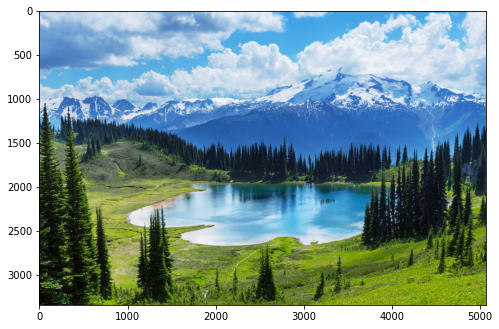

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [ ]:
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

Text(0.5, 1.0, 'Blue')

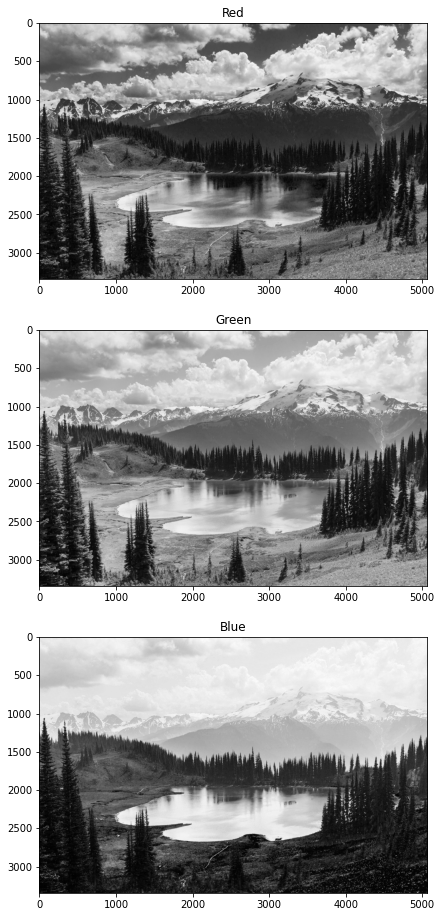

In [ ]:
plt.figure(figsize=(16, 16))

plt.subplot(3, 1, 1)
plt.imshow(red, cmap='gray')
plt.title('Red')

plt.subplot(3, 1, 2)
plt.imshow(green, cmap='gray')
plt.title('Green')

plt.subplot(3, 1, 3)
plt.imshow(blue, cmap='gray')
plt.title('Blue')

In [ ]:
def view_result(res, name='nameless', cmap=None):
    plt.figure(figsize=(16, 16))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Orig')
    
    plt.subplot(1, 2, 2)
    if cmap:
        plt.imshow(res, cmap=cmap)
    else:
        plt.imshow(res)
    plt.title(name)
    
    plt.show()

## BlueUp

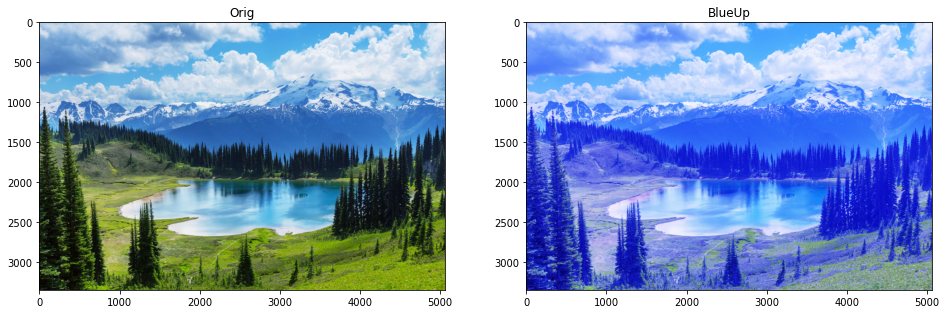

In [ ]:
img_blueup = img.copy()
img_blueup[:, :, 2] = img_blueup[:, :, 2] ** 0.1

view_result(res=img_blueup, name='BlueUp')


## Inverse

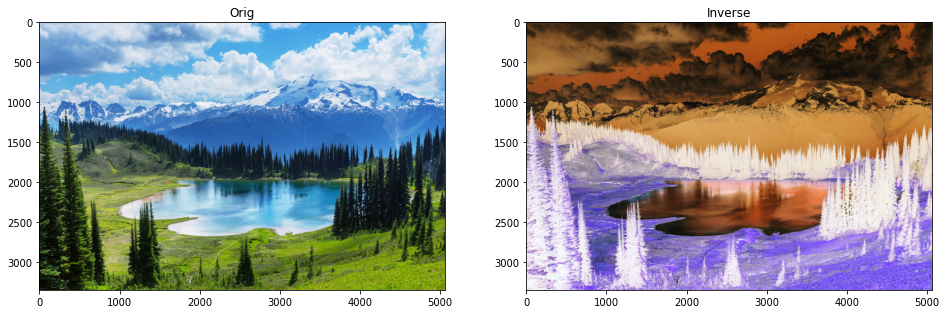

In [ ]:
img_inverse = img.copy()
img_inverse = np.ones((img_inverse.shape[0], img_inverse.shape[1], 3)) + img_inverse * -1

view_result(res=img_inverse, name='Inverse')

## Volume

(9, 9)


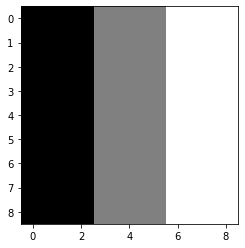

In [ ]:
# convolution

size = 9
win_size = (size, size)

w = np.ones(win_size)
w[:, size//3:] = 1
w[:, size//3:size//3*2] = 0
w[:, :size//3] = -1

print(w.shape)
plt.imshow(w, cmap='gray')

In [ ]:
%%time
img_copy = img.copy()
img_copy = img_copy.mean(axis=2)

out_img = np.zeros((img_copy.shape[0] - w.shape[0] + 1, 
                    img_copy.shape[1] - w.shape[1] + 1),
                   dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_copy[i:i+w.shape[0], j:j+w.shape[1]]
        out_img[i, j] = np.sum(w * x)

CPU times: user 2min 8s, sys: 248 ms, total: 2min 8s
Wall time: 2min 8s


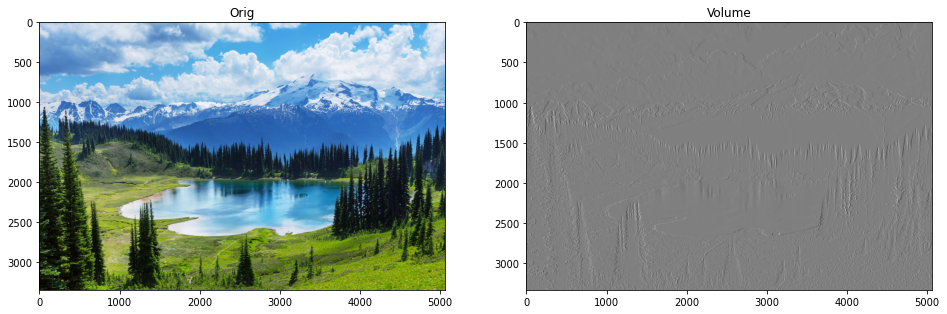

In [ ]:
view_result(res=out_img, name='Volume', cmap='gray')


## HSV

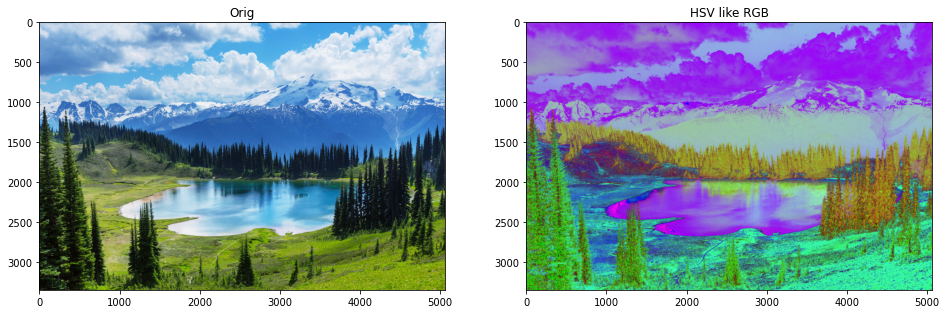

In [ ]:
img_hsv = rgb2hsv(img.copy())

view_result(res=img_hsv, name='HSV like RGB')

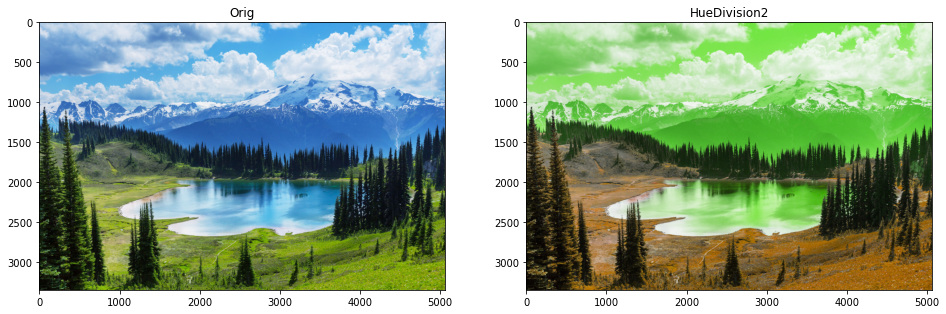

In [ ]:
img_hsv[:, :, 0] /= 2
img_rgb = hsv2rgb(img_hsv)

view_result(res=img_rgb, name='HueDivision2')

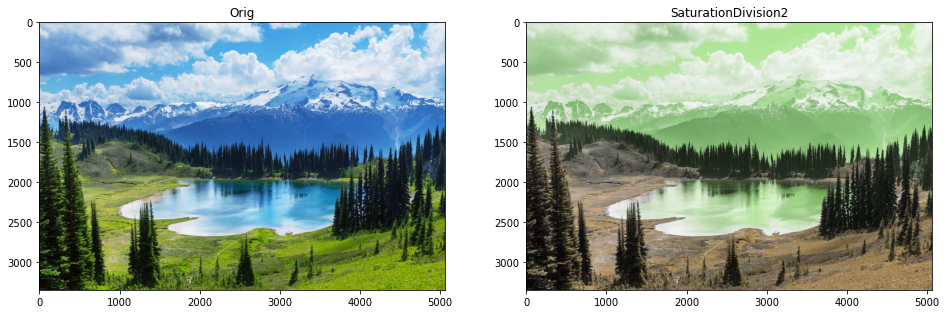

In [ ]:
img_hsv[:, :, 1] /= 2
img_rgb = hsv2rgb(img_hsv)

view_result(res=img_rgb, name='SaturationDivision2')

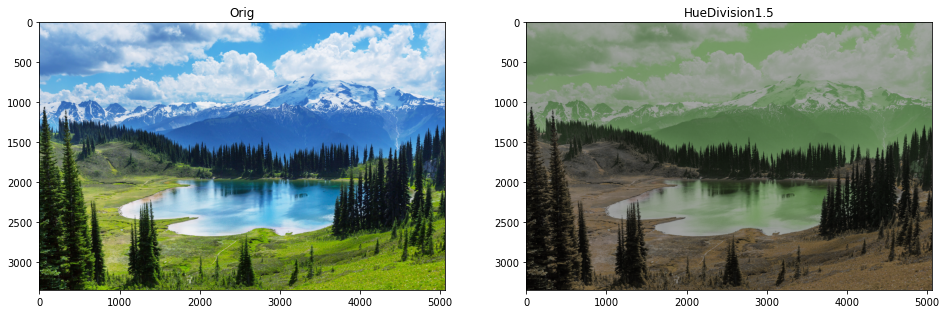

In [ ]:
img_hsv[:, :, 2] /= 1.5
img_rgb = hsv2rgb(img_hsv)

view_result(res=img_rgb, name='HueDivision1.5')